In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [50]:
def mape_cog(csv, cog_score):
    file = pd.read_csv(csv)
    file = file[["train_ratio", "experiment", "dataset", cog_score]]
    file[cog_score]= file[cog_score]*100
    return file

In [52]:
def plot_cog(data, cog_score, title):
    plt.figure(figsize=(10, 6))
    ax = sns.violinplot(data=data, x="train_ratio", y=cog_score, hue="dataset", hue_order=['train', 'test'], width = 0.8, scale = 'count', split = True) #, width = 2, gap = 0.01

    for patch in ax.collections:
        patch.set_alpha(0.4)

    sns.pointplot(x='train_ratio', y=cog_score, hue='dataset', data=data.groupby(['train_ratio', 'dataset'], as_index=False)[cog_score].median(), ax=ax, hue_order=['train', 'test'], markers="_")
    ax.set_yticks(np.arange(0, 50, 5))
    #set x axis limit to 100
    ax.set_ylim(-5, 50)
    #plt.axhline(10, c='r')
    #plt.axhline(5, c='g', linestyle='--')
    plt.ylabel(cog_score)
    plt.axhline(0, c='k')
    # plt.suptitle(f"Training set ratio 20%, 20 experiments per size, thresh =  {threshold}%, FlippedEdge Aug")
    plt.suptitle(title)

    plt.grid()

In [67]:
def plot_loss(csv, title):
    loss_j = pd.read_csv(csv)
    plt.figure(figsize=(10, 6))
    sns.pointplot(x='train_ratio', y='loss', data=loss_j.groupby(['train_ratio'], as_index=False)['loss'].median(), markers="_", label = "loss")
    sns.pointplot(x='train_ratio', y='target_decoding', data=loss_j.groupby(['train_ratio'], as_index=False)['target_decoding'].median(), markers="_", label='target decoding')
    sns.pointplot(x='train_ratio', y='kernel_feature', data=loss_j.groupby(['train_ratio'], as_index=False)['kernel_feature'].median(), markers="_", label = "kernel_feature")
    sns.pointplot(x='train_ratio', y='kernel_target', data=loss_j.groupby(['train_ratio'], as_index=False)['kernel_target'].median(), markers="_", label = "kernel_target")
    sns.pointplot(x='train_ratio', y='joint_embedding', data=loss_j.groupby(['train_ratio'], as_index=False)['joint_embedding'].median(), markers="_", label = "joint_embedding")
    #sns.pointplot(x='train_ratio', y='feature_decoding', data=loss_j.groupby(['train_ratio'], as_index=False)['feature_decoding'].median(), markers="_", label = "feature_decoding")

    plt.grid()
    plt.legend(title=title)
    plt.show()

/tmp/ipykernel_379314/1626299881.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(data=data, x="train_ratio", y=cog_score, hue="dataset", hue_order=['train', 'test'], width = 0.8, scale = 'count', split = True) #, width = 2, gap = 0.01


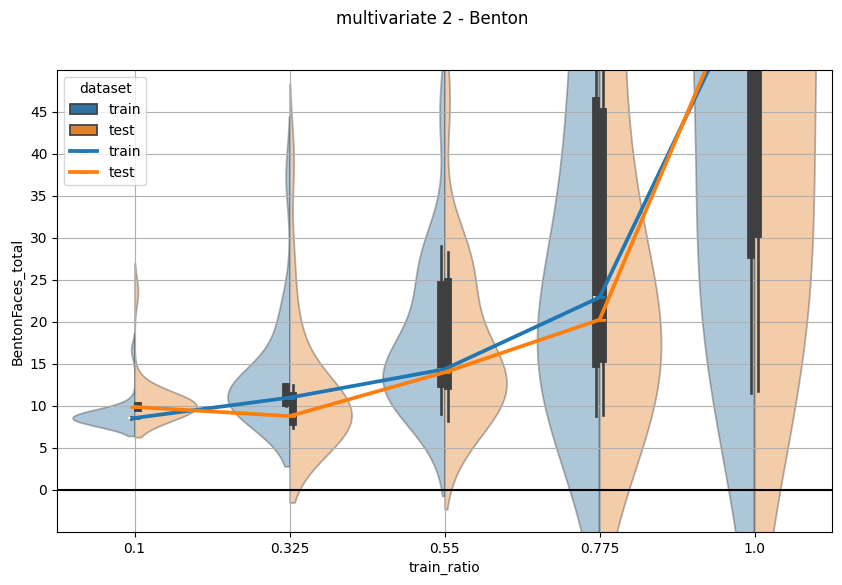

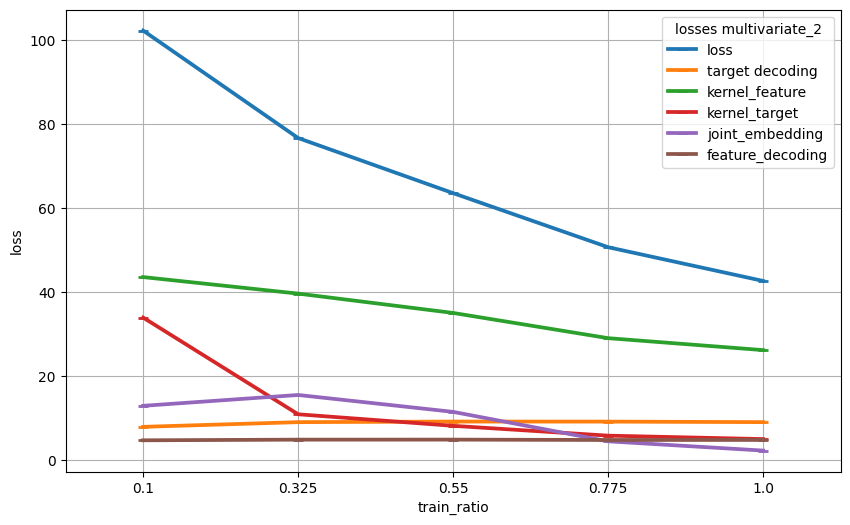

In [66]:
data = mape_cog("results/multivariate/multivariate_2.csv", "BentonFaces_total")
plot_cog(data, "BentonFaces_total", "multivariate 2 - Benton")
plot_loss("results/multivariate/loss_multivariate_2.csv", "losses multivariate_2")


/tmp/ipykernel_379314/1626299881.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(data=data, x="train_ratio", y=cog_score, hue="dataset", hue_order=['train', 'test'], width = 0.8, scale = 'count', split = True) #, width = 2, gap = 0.01


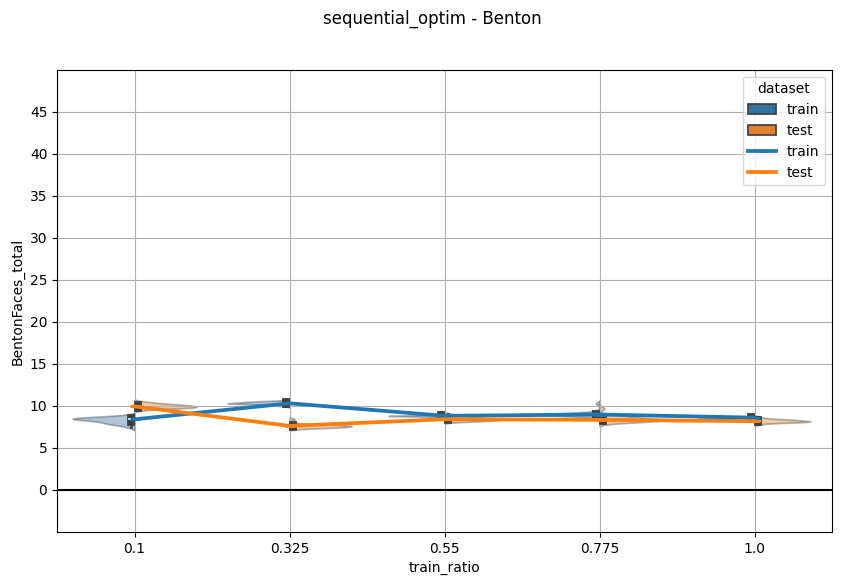

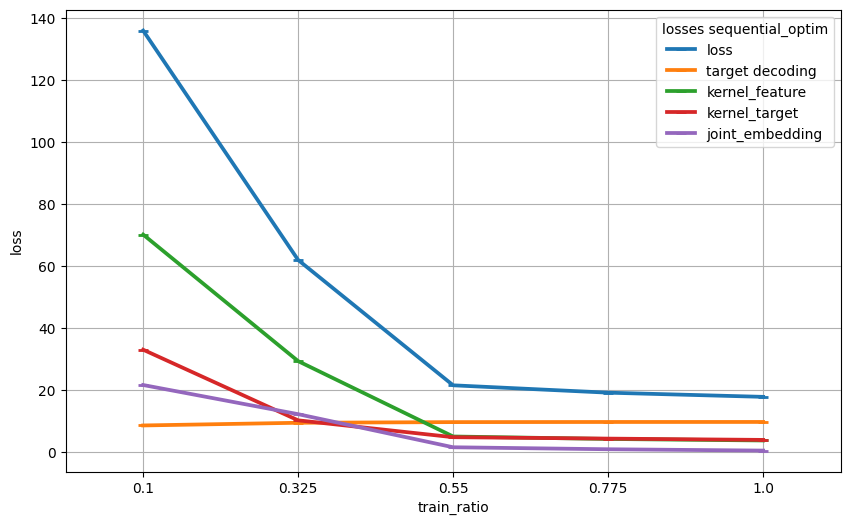

In [64]:
data = mape_cog("results/multivariate/sequential_optim.csv", "BentonFaces_total")
plot_cog(data, "BentonFaces_total", "sequential_optim - Benton")
plot_loss("results/multivariate/loss_sequential_optim.csv", "losses sequential_optim")

/tmp/ipykernel_379314/1626299881.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(data=data, x="train_ratio", y=cog_score, hue="dataset", hue_order=['train', 'test'], width = 0.8, scale = 'count', split = True) #, width = 2, gap = 0.01


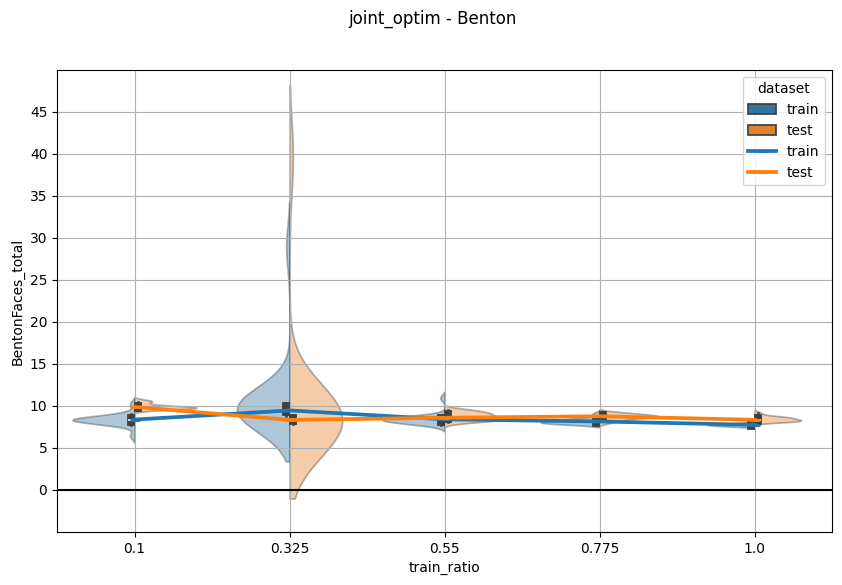

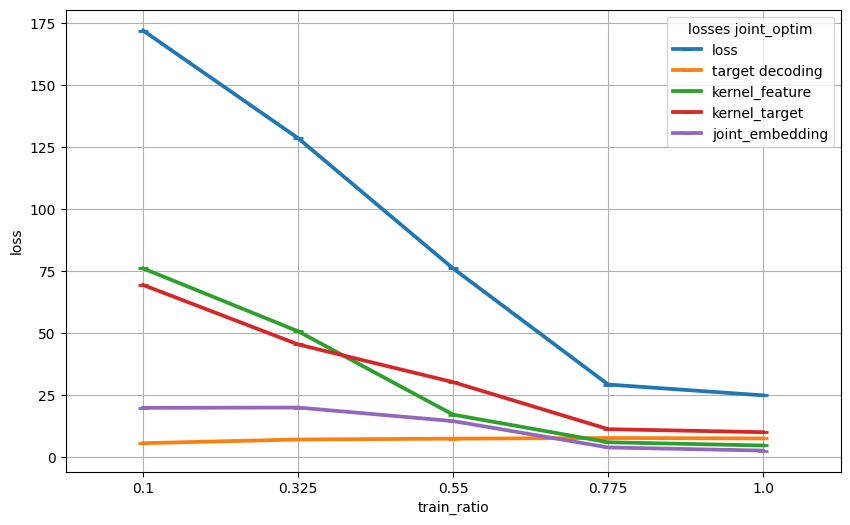

In [68]:
data = mape_cog("results/multivariate/joint_optim.csv", "BentonFaces_total")
plot_cog(data, "BentonFaces_total", "joint_optim - Benton")
plot_loss("results/multivariate/loss_joint_optim.csv", "losses joint_optim")

In [71]:
t = pd.read_csv("results/multivariate/MAPE_target_decodingg.csv")
t

,Unnamed: 0,train_ratio,experiment,dataset,BentonFaces_total,Cattell_total,EkmanEmHex_pca1,EkmanEmHex_pca1_expv,FamousFaces_details,Hotel_time,...,Proverbs,RTchoice,RTsimple,Synsem_prop_error,Synsem_RT,TOT,VSTMcolour_K_mean,VSTMcolour_K_precision,VSTMcolour_K_doubt,VSTMcolour_MSE
0,0,0.1,0,test,0.102576,0.231908,1.123647,0.000032,0.105739,0.476602,...,1.236698e+09,0.196511,0.146309,24417080.0,0.233033,4.173308e+05,0.155485,0.164755,2.689366,0.330376
1,1,0.1,0,train,0.084854,0.171683,1.934849,0.000024,0.073286,0.710970,...,1.759367e+09,0.162838,0.148749,76358320.0,0.228224,4.872339e-01,0.157171,0.121436,2.190866,0.463057
2,2,0.1,1,test,0.098381,0.233746,1.362919,0.000009,0.105379,0.550423,...,1.217016e+09,0.202681,0.152447,22428890.0,0.247270,4.067631e+05,0.161764,0.167734,2.830164,0.377066
3,3,0.1,1,train,0.081996,0.172876,2.119628,0.000009,0.077558,0.755795,...,1.508890e+09,0.175971,0.154096,53867452.0,0.237708,5.279014e-01,0.150737,0.135036,2.421654,0.553807
4,4,0.1,2,test,0.099451,0.232945,1.161095,0.000006,0.105040,0.548720,...,1.214017e+09,0.185097,0.149934,28490488.0,0.244235,4.114015e+05,0.157122,0.151812,3.132546,0.349420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,1.0,17,train,0.084613,0.192985,1.401286,0.000002,0.103415,0.846579,...,1.294449e+09,0.177999,0.148767,23010000.0,0.212795,1.140462e+08,0.150129,0.136878,1.799986,0.466362
196,196,1.0,18,test,0.080242,0.199572,2.213039,0.000002,0.091713,0.851903,...,5.953160e+08,0.207728,0.142755,26882816.0,0.248086,7.978744e-01,0.157778,0.131523,1.722670,0.472913
197,197,1.0,18,train,0.084873,0.193797,1.765426,0.000003,0.103782,0.866736,...,1.322058e+09,0.179193,0.154177,25060656.0,0.205801,1.148195e+08,0.149014,0.140147,1.747975,0.450750
198,198,1.0,19,test,0.080440,0.198677,1.931077,0.000001,0.092295,0.832655,...,5.912258e+08,0.214060,0.135083,23762958.0,0.264167,7.660818e-01,0.159250,0.130184,1.767908,0.504644


/tmp/ipykernel_379314/1626299881.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(data=data, x="train_ratio", y=cog_score, hue="dataset", hue_order=['train', 'test'], width = 0.8, scale = 'count', split = True) #, width = 2, gap = 0.01


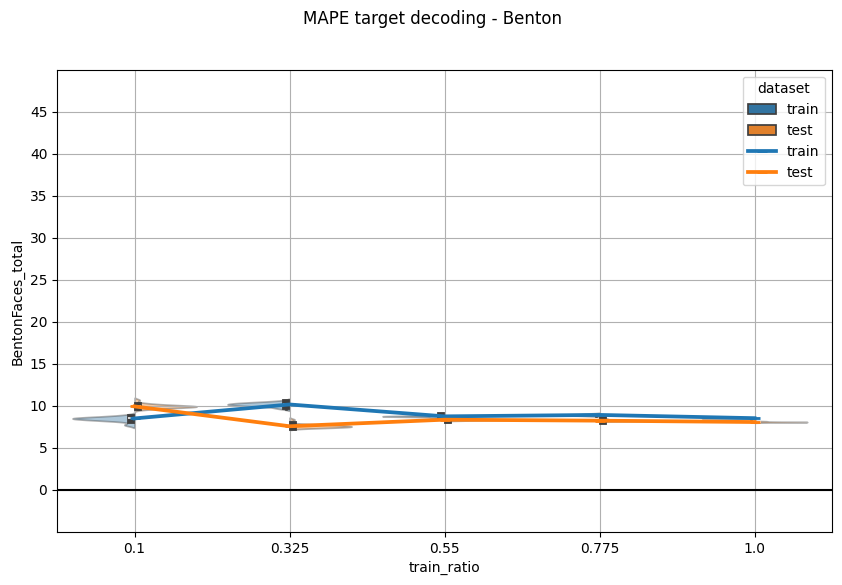

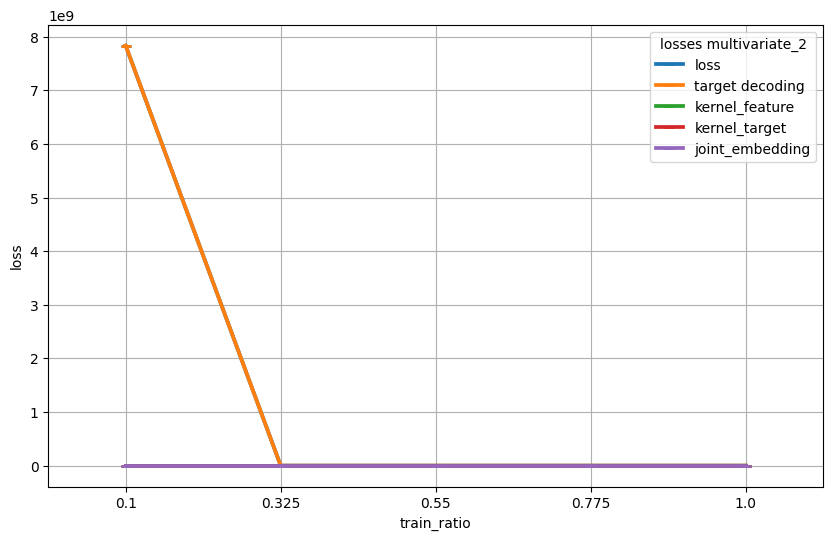

In [72]:
data = mape_cog("results/multivariate/MAPE_target_decodingg.csv", "BentonFaces_total")
plot_cog(data, "BentonFaces_total", "MAPE target decoding - Benton")
plot_loss("results/multivariate/loss_MAPE_target_decoding.csv", "losses multivariate_2")

/tmp/ipykernel_379314/1626299881.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(data=data, x="train_ratio", y=cog_score, hue="dataset", hue_order=['train', 'test'], width = 0.8, scale = 'count', split = True) #, width = 2, gap = 0.01


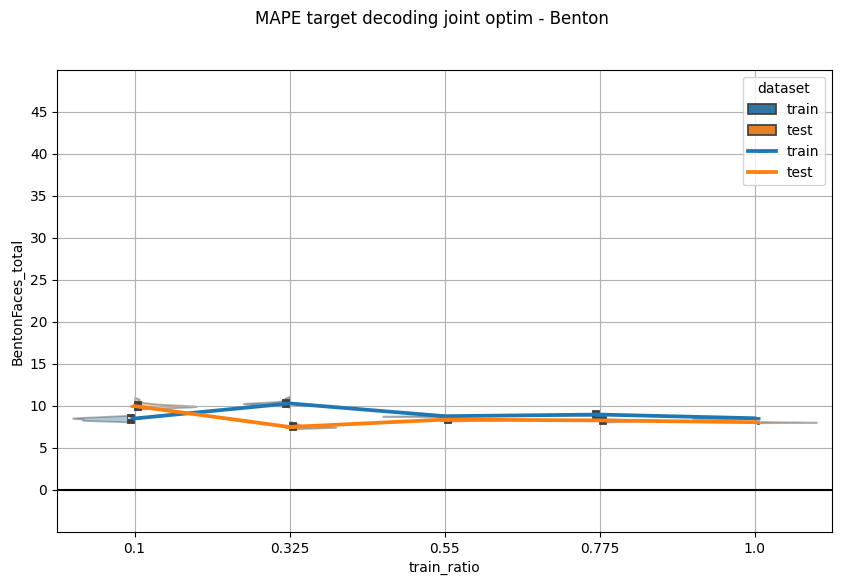

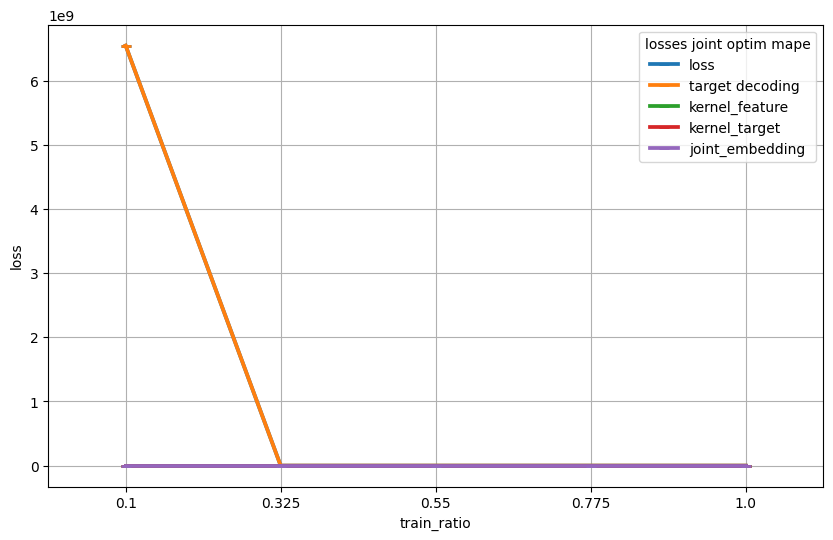

In [73]:
data = mape_cog("results/multivariate/joint_optim_MAPE_td.csv", "BentonFaces_total")
plot_cog(data, "BentonFaces_total", "MAPE target decoding joint optim - Benton")
plot_loss("results/multivariate/loss_joint_optim_MAPE_td.csv", "losses joint optim mape")

In [42]:
t = pd.read_csv("results/multivariate/multivariate_2.csv")
t

,Unnamed: 0,train_ratio,experiment,dataset,BentonFaces_total,Cattell_total,EkmanEmHex_pca1,EkmanEmHex_pca1_expv,FamousFaces_details,Hotel_time,...,Proverbs,RTchoice,RTsimple,Synsem_prop_error,Synsem_RT,TOT,VSTMcolour_K_mean,VSTMcolour_K_precision,VSTMcolour_K_doubt,VSTMcolour_MSE
0,0,0.1,0,test,0.097012,0.235813,1.183686,0.000007,0.104970,0.527803,...,1.256584e+09,0.199847,0.163124,33541920.0,0.231324,3.732911e+05,0.154153,0.151493,2.833867,0.337330
1,1,0.1,0,train,0.086036,0.171388,1.779481,0.000007,0.077537,0.738368,...,1.562758e+09,0.172183,0.164908,82847336.0,0.224439,4.516047e-01,0.148453,0.134368,2.247790,0.481835
2,2,0.1,1,test,0.098124,0.228253,1.457118,0.000014,0.104561,0.568906,...,1.137489e+09,0.228620,0.178927,28780720.0,0.233352,4.048504e+05,0.156597,0.150121,2.995243,0.346140
3,3,0.1,1,train,0.085256,0.170719,2.364316,0.000014,0.079181,0.802219,...,1.430116e+09,0.195614,0.180362,72401030.0,0.227923,4.934042e-01,0.147829,0.134310,2.370172,0.504962
4,4,0.1,2,test,0.101071,0.237709,1.253293,0.000018,0.105925,0.592060,...,1.211962e+09,0.204675,0.163662,27508666.0,0.228579,3.763882e+05,0.163317,0.151603,3.162938,0.347967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,1.0,17,train,0.273211,1.416724,57.161972,0.000160,0.298091,6.317039,...,1.821322e+09,1.474593,1.246967,117095976.0,1.207010,1.521959e+08,0.382271,0.593600,3.776609,0.912475
196,196,1.0,18,test,0.555689,2.310830,52.722645,0.000980,0.198352,5.477528,...,6.703202e+08,3.622701,3.418284,124984800.0,3.728255,3.024736e+00,0.604240,0.193893,9.003926,0.456496
197,197,1.0,18,train,0.552090,2.330678,30.195180,0.000928,0.227975,5.963706,...,8.516646e+08,3.405409,3.313769,226397540.0,3.436682,1.409927e+08,0.591509,0.220884,10.410987,0.452373
198,198,1.0,19,test,0.374083,1.860239,18.887974,0.000893,0.325201,5.988594,...,1.677664e+08,2.354570,1.097761,84840590.0,0.629227,2.390681e+00,1.504412,0.705424,4.090574,2.815658


In [43]:
t = t[["train_ratio", "experiment", "dataset", "BentonFaces_total"]]
t["BentonFaces_total"]= t["BentonFaces_total"]*100
t

/tmp/ipykernel_379314/585473082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t["BentonFaces_total"]= t["BentonFaces_total"]*100


,train_ratio,experiment,dataset,BentonFaces_total
0,0.1,0,test,9.701230
1,0.1,0,train,8.603614
2,0.1,1,test,9.812352
3,0.1,1,train,8.525609
4,0.1,2,test,10.107114
...,...,...,...,...
195,1.0,17,train,27.321073
196,1.0,18,test,55.568886
197,1.0,18,train,55.208963
198,1.0,19,test,37.408337


/tmp/ipykernel_379314/2922890699.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(data=t, x="train_ratio", y="BentonFaces_total", hue="dataset", hue_order=['train', 'test'], width = 0.8, scale = 'count', split = True) #, width = 2, gap = 0.01


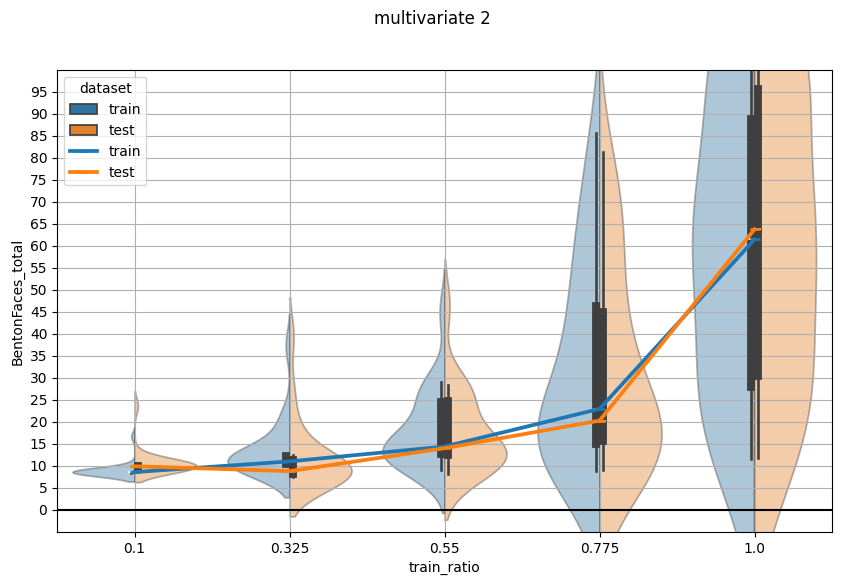

In [44]:

plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=t, x="train_ratio", y="BentonFaces_total", hue="dataset", hue_order=['train', 'test'], width = 0.8, scale = 'count', split = True) #, width = 2, gap = 0.01

for patch in ax.collections:
    patch.set_alpha(0.4)

sns.pointplot(x='train_ratio', y='BentonFaces_total', hue='dataset', data=t.groupby(['train_ratio', 'dataset'], as_index=False)['BentonFaces_total'].median(), ax=ax, hue_order=['train', 'test'], markers="_")
ax.set_yticks(np.arange(0, 100, 5))
#set x axis limit to 100
ax.set_ylim(-5, 100)
#plt.axhline(10, c='r')
#plt.axhline(5, c='g', linestyle='--')
plt.ylabel("BentonFaces_total")
plt.axhline(0, c='k')
# plt.suptitle(f"Training set ratio 20%, 20 experiments per size, thresh =  {threshold}%, FlippedEdge Aug")
plt.suptitle(f"multivariate 2")

plt.grid()

In [45]:
d = pd.read_csv("results/multivariate/sequential_optim.csv")
d

,Unnamed: 0,train_ratio,experiment,dataset,BentonFaces_total,Cattell_total,EkmanEmHex_pca1,EkmanEmHex_pca1_expv,FamousFaces_details,Hotel_time,...,Proverbs,RTchoice,RTsimple,Synsem_prop_error,Synsem_RT,TOT,VSTMcolour_K_mean,VSTMcolour_K_precision,VSTMcolour_K_doubt,VSTMcolour_MSE
0,0,0.1,0,test,0.101004,0.231957,1.369047,0.000010,0.108334,0.544829,...,1.113430e+09,0.198445,0.162206,33951612.0,0.225614,3.889437e+05,0.159168,0.162529,2.941509,0.328942
1,1,0.1,0,train,0.080569,0.173150,2.435672,0.000007,0.078182,0.733595,...,1.530127e+09,0.159442,0.146816,70841520.0,0.199902,4.667957e-01,0.145734,0.121808,2.320506,0.433956
2,2,0.1,1,test,0.098917,0.232603,1.397271,0.000017,0.110097,0.519384,...,1.262755e+09,0.185390,0.146098,34954710.0,0.235396,3.846702e+05,0.162047,0.160300,2.816296,0.343389
3,3,0.1,1,train,0.083729,0.171579,1.776647,0.000019,0.076421,0.704978,...,1.429989e+09,0.156462,0.134660,88179060.0,0.214647,4.769901e-01,0.150148,0.134177,2.250696,0.512013
4,4,0.1,2,test,0.104198,0.237883,1.722007,0.000013,0.105138,0.516220,...,1.408123e+09,0.182525,0.141568,30238414.0,0.238544,4.041988e+05,0.165396,0.164937,2.878549,0.395068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,1.0,17,train,0.085300,0.196989,2.017310,0.000004,0.105157,0.844294,...,1.381125e+09,0.176925,0.150309,24235716.0,0.205670,1.151446e+08,0.149814,0.140194,1.751692,0.461504
196,196,1.0,18,test,0.083061,0.206587,2.263888,0.000005,0.094434,0.849131,...,6.152031e+08,0.210024,0.143129,25776674.0,0.257879,8.414226e-01,0.166073,0.132693,1.791084,0.534754
197,197,1.0,18,train,0.086493,0.194709,1.092308,0.000003,0.104124,0.860521,...,1.395534e+09,0.180360,0.157916,27447348.0,0.216980,1.180478e+08,0.149362,0.138592,1.844197,0.455132
198,198,1.0,19,test,0.081519,0.198882,1.530511,0.000004,0.092115,0.844403,...,6.470653e+08,0.216027,0.148644,23555770.0,0.246329,8.183768e-01,0.156958,0.134190,1.773712,0.494929


In [46]:
d = d[["train_ratio", "experiment", "dataset", "BentonFaces_total"]]
d["BentonFaces_total"]= d["BentonFaces_total"]*100
d

/tmp/ipykernel_379314/2270332991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["BentonFaces_total"]= d["BentonFaces_total"]*100


,train_ratio,experiment,dataset,BentonFaces_total
0,0.1,0,test,10.100405
1,0.1,0,train,8.056948
2,0.1,1,test,9.891745
3,0.1,1,train,8.372896
4,0.1,2,test,10.419779
...,...,...,...,...
195,1.0,17,train,8.530015
196,1.0,18,test,8.306121
197,1.0,18,train,8.649311
198,1.0,19,test,8.151906


/tmp/ipykernel_379314/1796931396.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(data=d, x="train_ratio", y="BentonFaces_total", hue="dataset", hue_order=['train', 'test'], width = 0.8, scale = 'count', split = True) #, width = 2, gap = 0.01


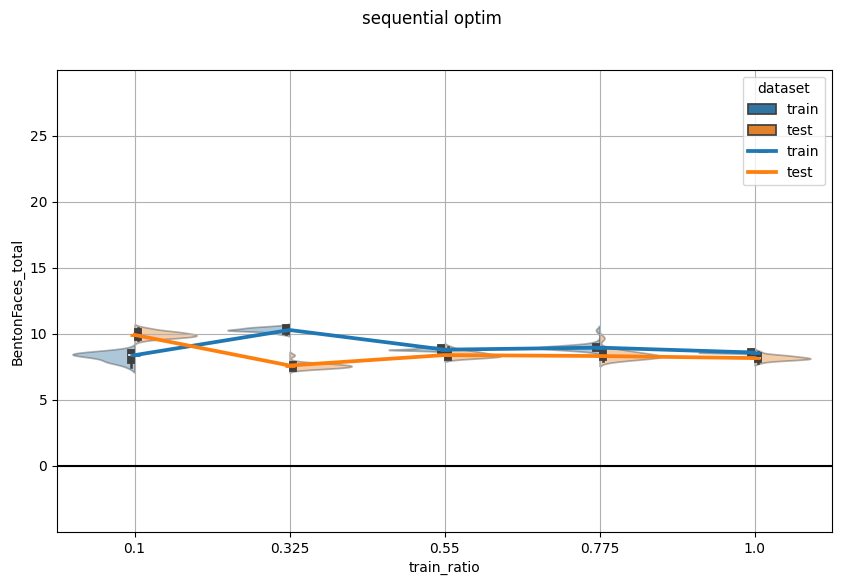

In [47]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=d, x="train_ratio", y="BentonFaces_total", hue="dataset", hue_order=['train', 'test'], width = 0.8, scale = 'count', split = True) #, width = 2, gap = 0.01

for patch in ax.collections:
    patch.set_alpha(0.4)

sns.pointplot(x='train_ratio', y='BentonFaces_total', hue='dataset', data=d.groupby(['train_ratio', 'dataset'], as_index=False)['BentonFaces_total'].median(), ax=ax, hue_order=['train', 'test'], markers="_")
ax.set_yticks(np.arange(0, 30, 5))
#set x axis limit to 100
ax.set_ylim(-5, 30)
#plt.axhline(10, c='r')
#plt.axhline(5, c='g', linestyle='--')
plt.ylabel("BentonFaces_total")
plt.axhline(0, c='k')
# plt.suptitle(f"Training set ratio 20%, 20 experiments per size, thresh =  {threshold}%, FlippedEdge Aug")
plt.suptitle(f"sequential optim")

plt.grid()

In [20]:
f = pd.read_csv("results/multivariate/joint_optim.csv")
f

,Unnamed: 0,train_ratio,experiment,dataset,BentonFaces_total,Cattell_total,EkmanEmHex_pca1,EkmanEmHex_pca1_expv,FamousFaces_details,Hotel_time,...,Proverbs,RTchoice,RTsimple,Synsem_prop_error,Synsem_RT,TOT,VSTMcolour_K_mean,VSTMcolour_K_precision,VSTMcolour_K_doubt,VSTMcolour_MSE
0,0,0.1,0,test,0.096737,0.227044,1.182638,0.000013,0.106820,0.536417,...,1.253437e+09,0.189259,0.148291,29858162.0,0.237864,4.185791e+05,0.159509,0.159301,3.393944,0.345069
1,1,0.1,0,train,0.076528,0.172249,1.532232,0.000014,0.073792,0.766998,...,1.554093e+09,0.162781,0.144074,66670440.0,0.240340,4.610112e-01,0.145244,0.134464,2.378405,0.485169
2,2,0.1,1,test,0.105925,0.232425,1.486688,0.000005,0.108531,0.568468,...,9.689340e+08,0.204781,0.184028,27296720.0,0.259269,4.134757e+05,0.157408,0.143778,3.032854,0.460544
3,3,0.1,1,train,0.077974,0.170804,1.205119,0.000003,0.073062,0.815520,...,1.408514e+09,0.189072,0.151146,68665390.0,0.265676,5.258617e-01,0.123338,0.115477,2.478707,0.484187
4,4,0.1,2,test,0.098681,0.235126,1.286591,0.000004,0.112701,0.534450,...,1.273570e+09,0.195066,0.142441,31106846.0,0.236583,3.789552e+05,0.158598,0.170150,3.097438,0.359538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,1.0,17,train,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,196,1.0,18,test,0.081829,0.208219,3.599534,0.000003,0.096005,0.899364,...,6.749985e+08,0.207699,0.145700,24809696.0,0.247020,8.115558e-01,0.164866,0.140584,1.778186,0.473961
197,197,1.0,18,train,0.075542,0.148984,1.943297,0.000003,0.085925,0.743318,...,1.344936e+09,0.130055,0.129582,21721710.0,0.198874,1.229392e+08,0.118331,0.123847,1.822213,0.306493
198,198,1.0,19,test,0.082657,0.202627,4.925349,0.000003,0.097477,0.848579,...,6.188808e+08,0.207467,0.145193,19489262.0,0.236547,7.859034e-01,0.161658,0.151255,1.800244,0.421697


In [21]:
f = f[["train_ratio", "experiment", "dataset", "BentonFaces_total"]]
f["BentonFaces_total"]= f["BentonFaces_total"]*100
f

/tmp/ipykernel_379314/26738427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f["BentonFaces_total"]= f["BentonFaces_total"]*100


,train_ratio,experiment,dataset,BentonFaces_total
0,0.1,0,test,9.673717
1,0.1,0,train,7.652772
2,0.1,1,test,10.592501
3,0.1,1,train,7.797365
4,0.1,2,test,9.868054
...,...,...,...,...
195,1.0,17,train,NaN
196,1.0,18,test,8.182880
197,1.0,18,train,7.554250
198,1.0,19,test,8.265664


/tmp/ipykernel_379314/804227148.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(data=f, x="train_ratio", y="BentonFaces_total", hue="dataset", hue_order=['train', 'test'], width = 0.8, scale = 'count', split = True) #, width = 2, gap = 0.01
/tmp/ipykernel_379314/804227148.py:18: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(data=d, x="train_ratio", y="BentonFaces_total", hue="dataset", hue_order=['train', 'test'], width = 0.8, scale = 'count', split = True) #, width = 2, gap = 0.01


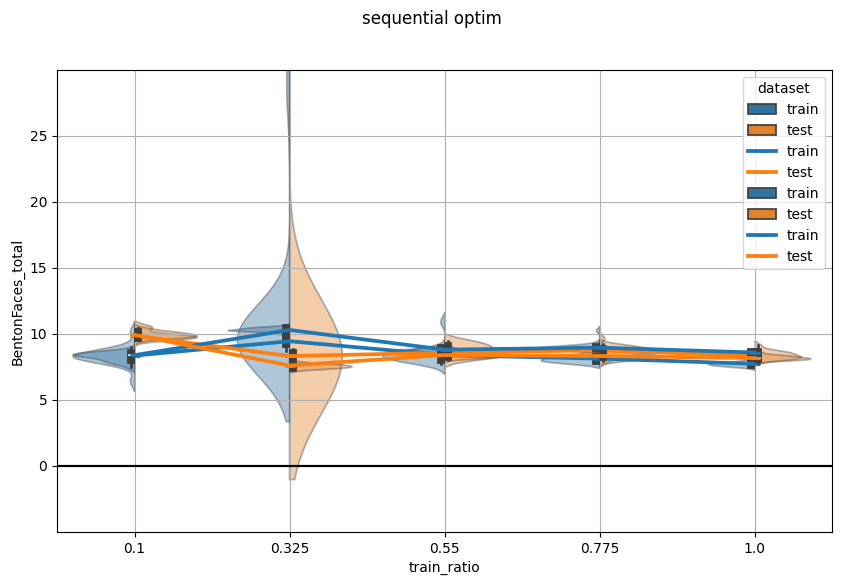

In [25]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=f, x="train_ratio", y="BentonFaces_total", hue="dataset", hue_order=['train', 'test'], width = 0.8, scale = 'count', split = True) #, width = 2, gap = 0.01

for patch in ax.collections:
    patch.set_alpha(0.4)

sns.pointplot(x='train_ratio', y='BentonFaces_total', hue='dataset', data=f.groupby(['train_ratio', 'dataset'], as_index=False)['BentonFaces_total'].median(), ax=ax, hue_order=['train', 'test'], markers="_")
ax.set_yticks(np.arange(0, 30, 5))
#set x axis limit to 100
ax.set_ylim(-5, 30)
#plt.axhline(10, c='r')
#plt.axhline(5, c='g', linestyle='--')
plt.ylabel("BentonFaces_total")
plt.axhline(0, c='k')
# plt.suptitle(f"Training set ratio 20%, 20 experiments per size, thresh =  {threshold}%, FlippedEdge Aug")
plt.suptitle(f"joint optim")

ax = sns.violinplot(data=d, x="train_ratio", y="BentonFaces_total", hue="dataset", hue_order=['train', 'test'], width = 0.8, scale = 'count', split = True) #, width = 2, gap = 0.01

for patch in ax.collections:
    patch.set_alpha(0.4)

sns.pointplot(x='train_ratio', y='BentonFaces_total', hue='dataset', data=d.groupby(['train_ratio', 'dataset'], as_index=False)['BentonFaces_total'].median(), ax=ax, hue_order=['train', 'test'], markers="_", c="r")
ax.set_yticks(np.arange(0, 30, 5))
#set x axis limit to 100
ax.set_ylim(-5, 30)
#plt.axhline(10, c='r')
#plt.axhline(5, c='g', linestyle='--')
plt.ylabel("BentonFaces_total")
plt.axhline(0, c='k')
# plt.suptitle(f"Training set ratio 20%, 20 experiments per size, thresh =  {threshold}%, FlippedEdge Aug")
plt.suptitle(f"sequential optim")

plt.grid()

In [27]:
loss_j = pd.read_csv("results/multivariate/loss_joint_optim.csv")
loss_j

,kernel_feature,kernel_target,joint_embedding,target_decoding,loss,epoch,train_ratio,experiment
0,48.466824,73.706512,57.849930,10.756160,190.779434,0,0.1,4
1,91.874130,57.109318,68.831261,11.052711,228.867401,1,0.1,4
2,92.902542,56.989841,57.452477,9.027451,216.372299,2,0.1,4
3,88.294464,53.595654,40.997143,8.246725,191.133987,3,0.1,4
4,81.724487,51.057140,29.799675,7.636845,170.218140,4,0.1,4
...,...,...,...,...,...,...,...,...
1789,4.439260,7.862480,2.176088,7.639940,22.117769,8,1.0,19
1790,4.408827,8.058962,2.045178,7.334736,21.847702,9,1.0,19
1791,4.219230,6.914165,1.406111,7.507273,20.046780,10,1.0,19
1792,4.040620,6.851362,1.330410,7.448070,19.670462,11,1.0,19


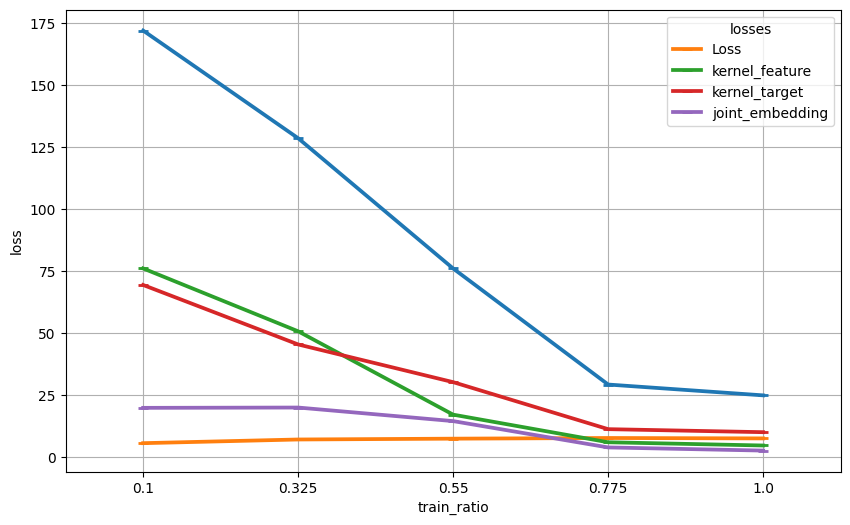

In [38]:
plot_loss(loss_j)